In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")

# Collect Data

In [127]:
#Import train data
train_df = pd.read_csv("train.csv")
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [128]:
print("Survival Count:\n",train_df.Survived.value_counts())

Survival Count:
 0    549
1    342
Name: Survived, dtype: int64


In [129]:
#Import test data
test_df = pd.read_csv("test.csv")
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Cleaning

In [132]:
# Count of Null values in each column
print("Count of nan values:")
train_df.isnull().sum()

Count of nan values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
#Converting datatype of fare from float to int
train_df['Fare'] = train_df['Fare'].astype(int)

Categorical Features : Name, Sex, Ticket, Cabin, Embarked | 
Non - Categorical Features : PassengerId, Pclass, Age, SibSp, Parch, Fare

In [134]:
#Count of Unique Values in Embarked
print("Count of nan values in Embarked Feature:")
train_df.Embarked.value_counts()

Count of nan values in Embarked Feature:


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
#Replacing Null by common value
train_df.Embarked.loc[train_df.Embarked.isna()] = 'S'

in Embarked, there are 2 NaN values, which can be replaced by most common value that is "S"

In the Name column, all passengers have unique name. A similarity can be found between all name values. Each name value has a Prefix assigned between "," and ".". Therefore, I extracted the Prefix and added one more column in Dataframe named "Prefix". This column, can be found in a relation with our target value "Survived".

In [136]:
#Extracting prefix using re
train_df["Prefix"] = train_df["Name"].str.extract(',\s*([^\.]*)\s*\.', expand=False)

In [137]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,Mr


In [138]:
#Count of Unique Values in Prefix
train_df.Prefix.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Capt              1
Mme               1
the Countess      1
Sir               1
Don               1
Lady              1
Ms                1
Name: Prefix, dtype: int64

In the given Prefix list, there are 16 unique values present. Out of which some of the values have similar meanings. Therefore, the list has been categorized to 6 unique values for the ease of analysis.

- Also, Mlle and Ms have been replaced by Miss as they have similar meaning. 

- Moreover, it is observed that there were passengers who belonged to the royally entitled family like Countess, Lady, Sir etc. I grouped them into a category named "Titled". Data shows all these titled passengers have survived. 

- While, for the rest of Prefix like Col, Major, Dr I have added them to the group of "Other", as they seem to be rare. 

In [139]:
train_df['Prefix'] = train_df['Prefix'].replace('Mlle', 'Miss')
train_df['Prefix'] = train_df['Prefix'].replace('Ms', 'Miss')

train_df['Prefix'] = train_df['Prefix'].replace(["Mme","the Countess", "Lady","Sir"], 'Titled')
train_df['Prefix'] = train_df['Prefix'].replace(["Capt", "Col","Don", "Jonkheer","Major","Rev","Dr"], 'Other')

In [140]:
#Survival Rate of Prefix
train_df[["Prefix","Survived"]].groupby('Prefix').mean()

,Survived
Prefix,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.792000
Other,0.250000
Titled,1.000000


In [141]:
#Age coulmn : Imputation of NaN values 

print("Age feature:\n")
print("Total count of Nan values:\n", train_df.Age.isnull().sum())
print()
print("Median Age of Passengers:\n", train_df.Age.median())
print()
print("Median Age of Passengers according to Gender:\n",train_df.groupby(['Sex'])['Age'].median())
print()
print("Median Age of Passengers according to Gender, Embarked and P-class:\n",train_df.groupby(['Embarked', 'Pclass'])['Age'].median())

Age feature:

Total count of Nan values:
 177

Median Age of Passengers:
 28.0

Median Age of Passengers according to Gender:
 Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Median Age of Passengers according to Gender, Embarked and P-class:
 Embarked  Pclass
C         1         36.5
          2         25.0
          3         20.0
Q         1         38.5
          2         43.5
          3         21.5
S         1         37.5
          2         30.0
          3         25.0
Name: Age, dtype: float64


In Age, there are 177 rows having NaN values. Instead of replacing with the median value of Passengers, there are few hypothesis that can be considered such as:

1) Towns have different average age, by using this factor we can consider the passenger boarding from 3 different shipping port might have different age group. 

2) The economy of a person increases with age, so here we can consider the elder age having class 1. 

Using these assumptions, the Age value can be replaced by considering the passenger's P-class and Embarked.

In [142]:
age_dict = train_df.groupby(['Embarked', 'Pclass'])['Age'].median().to_dict()
for (embark, pclass),age  in age_dict.items():
    train_df.loc[(train_df.Age.isnull()) &
                 (train_df["Embarked"] == embark) & 
                 (train_df["Pclass"] == pclass) , 'Age'] = age

In [143]:
train_df['Age'] = train_df['Age'].astype(int)
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,21,0,0,330877,8,NaN,Q,Mr


In dataframe, Cabin has 687 NaN values and Ticket and passengerID have unique values. These Columns do not seem to have any information that can affect the prediction. So these columns are dropped. 

As the Name column has already been used to find Prefix, so this column has also been discarded.

In [144]:
#dropping of few Coulmns
train_df.drop('Cabin',axis=1, inplace=True)
train_df.drop('Ticket',axis=1, inplace=True)
train_df.drop('Name',axis=1, inplace=True)
train_df.drop('PassengerId',axis=1, inplace=True)
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,male,22,1,0,7,S,Mr
1,1,1,female,38,1,0,71,C,Mrs
2,1,3,female,26,0,0,7,S,Miss
3,1,1,female,35,1,0,53,S,Mrs
4,0,3,male,35,0,0,8,S,Mr


**Test Data Cleaning**

In [145]:
#Count of NaN values in Test Dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Similar to train dataset, as cabin has many NaN values, so I whole column is dropped. 

In [146]:
#There is one missing value of Fare, so I replaced it by a mean value.
test_df.Fare.loc[test_df.Fare.isna()] = test_df['Fare'].mean()

#Using the similar concept of Age in train data, it is applied on the test data as well.
age_dict = test_df.groupby(['Sex','Embarked', 'Pclass'])['Age'].median().to_dict()
for (sex, embark, pclass),age  in age_dict.items():
    test_df.loc[(test_df.Age.isnull()) & 
                 (test_df["Sex"] == sex) & 
                 (test_df["Embarked"] == embark) & 
                 (test_df["Pclass"] == pclass) , 'Age'] = age

#In train data as SibSp and parch are combined, similar concept is used in Test Data
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
test_df['Family'] = test_df["Family"].replace(0,"Alone")
test_df['Family'] = test_df["Family"].replace([1,2,3,4,5,6,7,8,9,10],"With Family")

In [147]:
# extraxting prefix from the Name column
test_df["Prefix"] = test_df["Name"].str.extract(',\s*([^\.]*)\s*\.', expand=False)
test_df.Prefix.value_counts()

test_df['Prefix'] = test_df['Prefix'].replace('Ms', 'Miss')
test_df['Prefix'] = test_df['Prefix'].replace(["Mme","the Countess", "Lady","Sir"], 'Titled')
test_df['Prefix'] = test_df['Prefix'].replace(["Capt", "Col","Don", "Jonkheer","Major","Rev","Dr","Dona"], 'Other')

In [148]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
Prefix           0
dtype: int64

In [149]:
#Dropping of few columns
test_df.drop('Cabin',axis=1, inplace=True)
test_df.drop('Ticket',axis=1, inplace=True)
test_df.drop('Name',axis=1, inplace=True)
test_df.drop('SibSp',axis=1, inplace=True)
test_df.drop('Parch',axis=1, inplace=True)

test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Prefix
0,892,3,male,34.5,7.8292,Q,Alone,Mr
1,893,3,female,47.0,7.0000,S,With Family,Mrs
2,894,2,male,62.0,9.6875,Q,Alone,Mr
3,895,3,male,27.0,8.6625,S,Alone,Mr
4,896,3,female,22.0,12.2875,S,With Family,Mrs


# Data Analysis

## Single Feature vs Survived

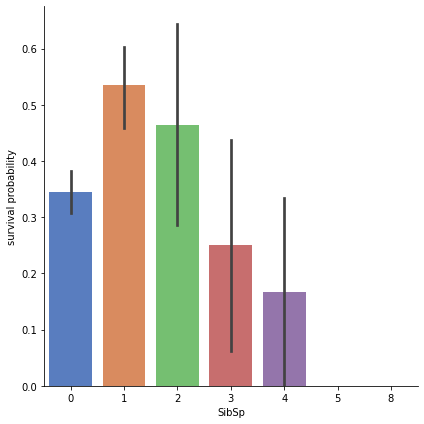

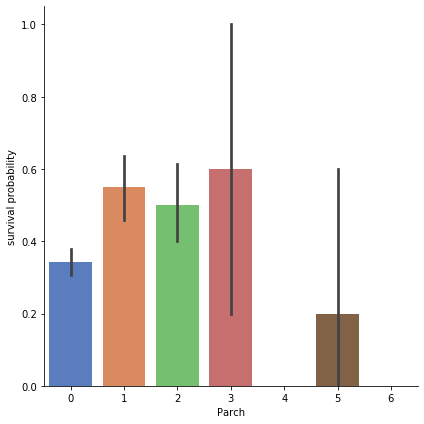

In [150]:
#Plotting SibSp vs Survived and Parch vs Survived 
g  = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
g = g.set_ylabels("survival probability")

h  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
h = h.set_ylabels("survival probability")

As I was not able get the insights from SibSp and Parch, So I combined them to one column named Family. 

In [151]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']

train_df['Family'] = train_df["Family"].replace(0,"Alone")
train_df['Family'] = train_df["Family"].replace([1,2,3,4,5,6,7,8,9,10],"With Family")

In [152]:
#Count of Unique Values in Family
train_df.Family.value_counts()

Alone          537
With Family    354
Name: Family, dtype: int64

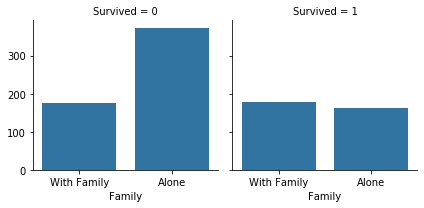

In [153]:
#Plot Family vs Survived
g = sns.FacetGrid(train_df, col="Survived") 
g = g.map(sns.countplot, "Family")

From the above graph, few insights are obtained:

1) The ratio of number of families who survived and the ones who did not are equal.

2) The survival to death ratio of passengers who came alone is 1:5

In [154]:
# Droppintg SibSp and Parch
train_df.drop('SibSp',axis=1, inplace=True)
train_df.drop('Parch',axis=1, inplace=True)

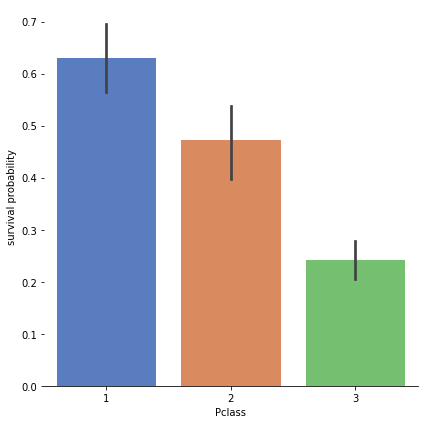

In [155]:
g  = sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Graph clearly sohws that survival rate is greater for class 1 passengers and so as the class decreases, survival rate also decreases

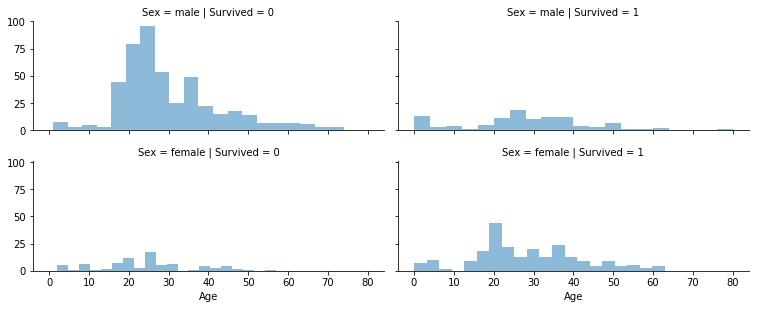

In [156]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=2.4)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

From, this graph : 

- The number of females who are rescued is more than that the number of females who couldn't.

- The number of males who are rescued is significantly less than the number of males who could not.

- In both the cases, passengers in the age group of 0-10 have shown similiar trend in the rate of survival.

- While for males, people of age>50 showed less rate of survival. 

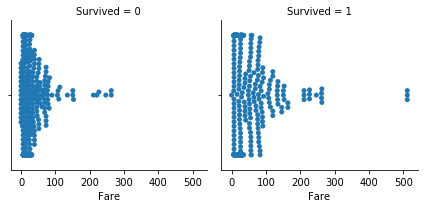

In [157]:
g = sns.FacetGrid(train_df, col='Survived')
g = g.map(sns.swarmplot, "Fare")

- Passengers who have paid a high fare like >100 have mostly survived.
- While there is a high count of death for passengers who paid fare less than 100. 

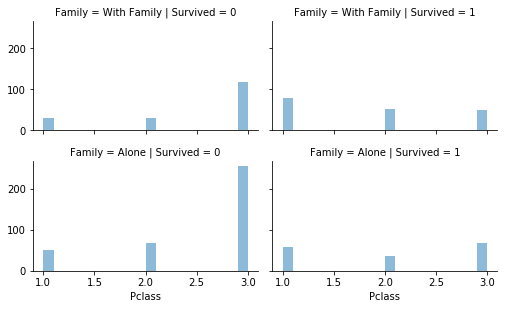

In [158]:
grid = sns.FacetGrid(train_df, col='Survived', row='Family', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Pclass', alpha=.5, bins=20)
grid.add_legend();

Following trends have been observed in the above graph:

- That survival priority is being given according to the class and family status. 
- The highest chance of survival was for passenger class 1 who had a family and then to a single passenger. 
- Later, Passenger class 2 joins this trend. Here, they first considered passengers with family and then passenger without family. 
- In the graph, it is noticed that there were high death rates for passenger class 3 without family consideration.
                                         

In [159]:
# Converting Categorical values of Train dataset to Numeric using Label Encoder
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

selected_col = ['Sex','Embarked','Prefix',"Family"]

lb_make.fit(train_df[selected_col].values.flatten())

train_df[selected_col] = train_df[selected_col].apply(lb_make.fit_transform)

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Prefix,Family
0,0,3,1,22,7,2,2,1
1,1,1,0,38,71,0,3,1
2,1,3,0,26,7,2,1,0
3,1,1,0,35,53,2,3,1
4,0,3,1,35,8,2,2,0
5,0,3,1,21,8,1,2,0
6,0,1,1,54,51,2,2,0
7,0,3,1,2,21,2,0,1
8,1,3,0,27,11,2,3,1
9,1,2,0,14,30,0,3,1


In [160]:
# Converting Categorical values of Test dataset to Numeric using Label Encoder
lb_make.fit(test_df[selected_col].values.flatten())

test_df[selected_col] = test_df[selected_col].apply(lb_make.fit_transform)

test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Prefix
0,892,3,1,34.5,7.8292,1,0,2
1,893,3,0,47.0,7.0000,2,1,3
2,894,2,1,62.0,9.6875,1,0,2
3,895,3,1,27.0,8.6625,2,0,2
4,896,3,0,22.0,12.2875,2,1,3
5,897,3,1,14.0,9.2250,2,0,2
6,898,3,0,30.0,7.6292,1,0,1
7,899,2,1,26.0,29.0000,2,1,2
8,900,3,0,18.0,7.2292,0,0,3
9,901,3,1,21.0,24.1500,2,1,2


enc = OneHotEncoder()
dummies = pd.get_dummies()

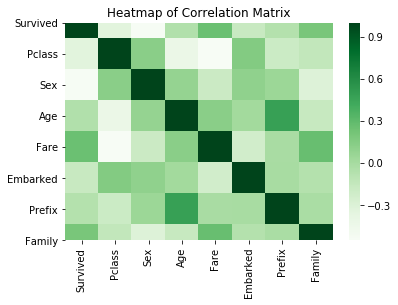

In [161]:
# Correlation Matrix 
corr = train_df.corr()   
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = "Greens")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Machine Learning Algorithm

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [163]:
# df of X_values
train = train_df[["Pclass","Sex","Age","Family","Fare","Embarked","Prefix"]]
train.head(5)

,Pclass,Sex,Age,Family,Fare,Embarked,Prefix
0,3,1,22,1,7,2,2
1,1,0,38,1,71,0,3
2,3,0,26,0,7,2,1
3,1,0,35,1,53,2,3
4,3,1,35,0,8,2,2


In [164]:
# splitting train dataset into train and test. 
X_train, X_test, Y_train, Y_test = train_test_split(train, train_df['Survived'], test_size=0.4)

In [165]:
# Logasitic Regression Model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,Y_train)
Y_pred_lr = model.predict(X_test)

# acc_log = round(model.score(X_train, Y_train) * 100, 2)
# print(acc_log)

acc_lr = accuracy_score(Y_test, Y_pred_lr)
print("Logistic Regression accuracy:",acc_lr)

Logistic Regression accuracy: 0.7955182072829131


In [166]:
# K Nearest Neighbours Model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred_knn = knn.predict(X_test)  

# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# print(acc_knn)

acc_knn = accuracy_score(Y_test, Y_pred_knn)
print("KNN accuracy:",acc_knn)

KNN accuracy: 0.6694677871148459


In [167]:
# Random Forest Classifier Model
model_rf = RandomForestClassifier(min_samples_leaf = 1, min_samples_split = 10, 
                                  max_features='auto', oob_score=True, random_state=1, n_jobs=-1, 
                                  n_estimators=100)
model_rf.fit(X_train,Y_train)
Y_pred_rf = model_rf.predict(X_test)

# acc_log = round(model_rf.score(X_train, Y_train) * 100, 2)
# print(acc_log)

acc_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest accuracy:",acc_rf)

Random Forest accuracy: 0.8151260504201681


In [168]:
# Cross validation of all three models
print("Cross Validation:")
print()

print("Logistic Regression")
scores_lr = cross_val_score(model, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores_lr)
print("Mean:", scores_lr.mean())
print("Standard Deviation:", scores_lr.std())

print()

print("KNN")
scores_knn = cross_val_score(knn, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores_knn)
print("Mean:", scores_knn.mean())
print("Standard Deviation:", scores_knn.std())

print()

print("Random Forest Classifier")
scores_rf = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores_rf)
print("Mean:", scores_rf.mean())
print("Standard Deviation:", scores_rf.std())

Cross Validation:

Logistic Regression
Scores: [0.79439252 0.75700935 0.75700935 0.82242991 0.82075472]
Mean: 0.7903191676952919
Standard Deviation: 0.02895894648001867

KNN
Scores: [0.69158879 0.63551402 0.70093458 0.65420561 0.71698113]
Mean: 0.6798448245459354
Standard Deviation: 0.030280004974422084

Random Forest Classifier
Scores: [0.82242991 0.78504673 0.80373832 0.86915888 0.82075472]
Mean: 0.8202257097513665
Standard Deviation: 0.027960644197993913


# Evaluation

In [169]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score,precision_recall_curve, precision_score
from sklearn import metrics

In [170]:
# Classification Report of all three Models
target_names1 = ["Survived = 0", "Survived = 1"]

print("Logistic Regression:")
print(classification_report(Y_test, Y_pred_lr, target_names=target_names1))

print("K Nearest Neighbours:")
print(classification_report(Y_test, Y_pred_knn, target_names=target_names1))

print("Random Forest:")
print(classification_report(Y_test, Y_pred_rf, target_names=target_names1))

Logistic Regression:
              precision    recall  f1-score   support

Survived = 0       0.82      0.85      0.84       220
Survived = 1       0.75      0.70      0.72       137

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.80      0.79       357

K Nearest Neighbours:
              precision    recall  f1-score   support

Survived = 0       0.71      0.78      0.74       220
Survived = 1       0.58      0.50      0.54       137

    accuracy                           0.67       357
   macro avg       0.65      0.64      0.64       357
weighted avg       0.66      0.67      0.66       357

Random Forest:
              precision    recall  f1-score   support

Survived = 0       0.83      0.88      0.85       220
Survived = 1       0.78      0.72      0.75       137

    accuracy                           0.82       357
   macro avg       0.81      0.80      0.80       357
weighted avg    

In [171]:
from sklearn.metrics import precision_score, recall_score

# Logistic Regression
print("Precision:", precision_score(Y_test, Y_pred_lr))
print("Recall:",recall_score(Y_test, Y_pred_lr))

Precision: 0.75
Recall: 0.7007299270072993


from the Report, we can see for Logistic Regression : precision is 75% and recall is 70%. That means 70% of the people actually survived

In [172]:
# KNN
print("Precision:", precision_score(Y_test, Y_pred_knn))
print("Recall:",recall_score(Y_test, Y_pred_knn))

Precision: 0.5811965811965812
Recall: 0.49635036496350365


from the classification Report, we can see for KNN : precision is 58% and recall is 49%. That means 49% of the people actually survived

In [173]:
# Random Forest

print("Precision:", precision_score(Y_test, Y_pred_rf))
print("Recall:",recall_score(Y_test, Y_pred_rf))

Precision: 0.784
Recall: 0.7153284671532847


from the classification Report, we can see for Random Forest : precision is 78% and recall is 72%. That means 72% of the people actually survived

ROC for Logistic Regression
ROC_AUC: 0.7776376907763769


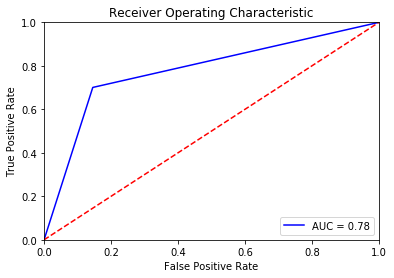

In [174]:
# Plotting ROC Curve
print("ROC for Logistic Regression")
fpr, tpr, thres = roc_curve(Y_test, Y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC:",roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for KNN:
ROC_AUC: 0.6368115461181155


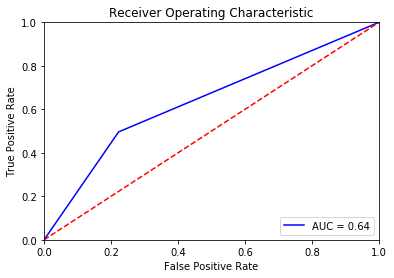

In [175]:
# Plotting ROC Curve
print("ROC Curve for KNN:")
fpr, tpr, thres = roc_curve(Y_test, Y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC:",roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for Randon Forest:
ROC_AUC: 0.7963005972130061


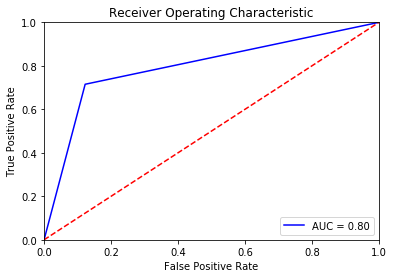

In [176]:
# Plotting ROC Curve
print("ROC Curve for Randon Forest:")
fpr, tpr, thres = roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC:",roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Using the precision, recall and ROC curve scores, it can be conculded for this dataset that Random Forest has appeared to be the best model.**

In ROC Curve for Random forest, the line bends more towards left. It defines the True positive rate, giving accuracy of 80%.

# Predicting Test Dataset

In [177]:
# Prediction of Test Dataset

ids = test_df['PassengerId']
predictions = model_rf.predict(test_df.drop('PassengerId', axis=1))

ground_df = pd.read_csv("gender_submission.csv")
acc = accuracy_score(ground_df["Survived"], predictions)

print("Accuracy Score for Test Dataset using Random Forest Model:", acc)


Accuracy Score for Test Dataset using Random Forest Model: 0.9019138755980861
